In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [2]:
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [3]:
# Посмотрим на распределение целевой переменной (уровень дохода)
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [4]:
# Объединим дублирующиеся значения целевой переменной
y = y.replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Проверим результат
y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

In [5]:
# Объединяем X и y в один DataFrame для удобства обработки
data = pd.concat([X, y], axis=1)

# Очистка данных
# Удаляем пробелы в текстовых столбцах
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Удаляем все дубликаты
data = data.drop_duplicates().reset_index(drop=True)

# Проверка информации о данных после очистки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48794 entries, 0 to 48793
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48794 non-null  int64 
 1   workclass       47831 non-null  object
 2   fnlwgt          48794 non-null  int64 
 3   education       48794 non-null  object
 4   education-num   48794 non-null  int64 
 5   marital-status  48794 non-null  object
 6   occupation      47828 non-null  object
 7   relationship    48794 non-null  object
 8   race            48794 non-null  object
 9   sex             48794 non-null  object
 10  capital-gain    48794 non-null  int64 
 11  capital-loss    48794 non-null  int64 
 12  hours-per-week  48794 non-null  int64 
 13  native-country  48520 non-null  object
 14  income          48794 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Заполним пропуски в категориальных столбцах значением "Unknown"
data['workclass'].fillna('Unknown', inplace=True)
data['occupation'].fillna('Unknown', inplace=True)
data['native-country'].fillna('Unknown', inplace=True)

# Проверим, что все пропуски устранены
print("\nКоличество пропущенных значений после обработки:")
print(data.isnull().sum())


Количество пропущенных значений после обработки:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


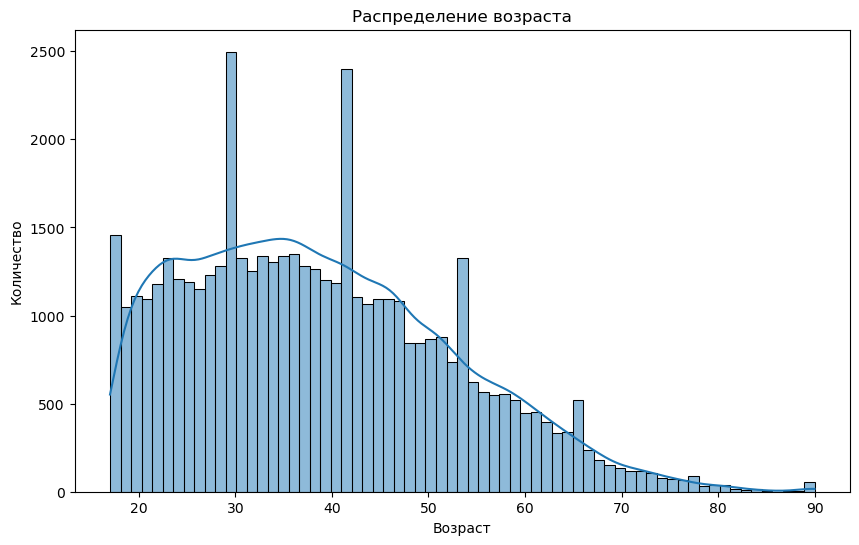

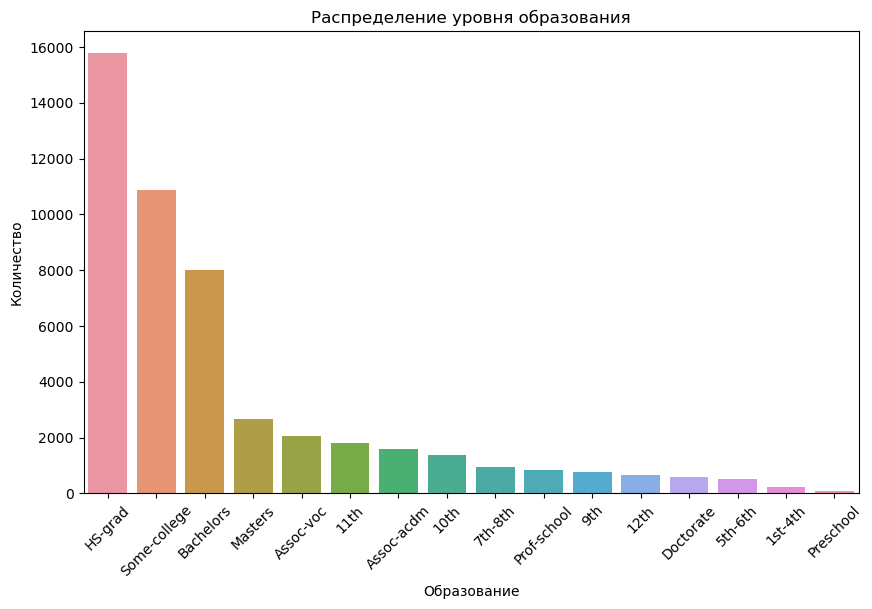

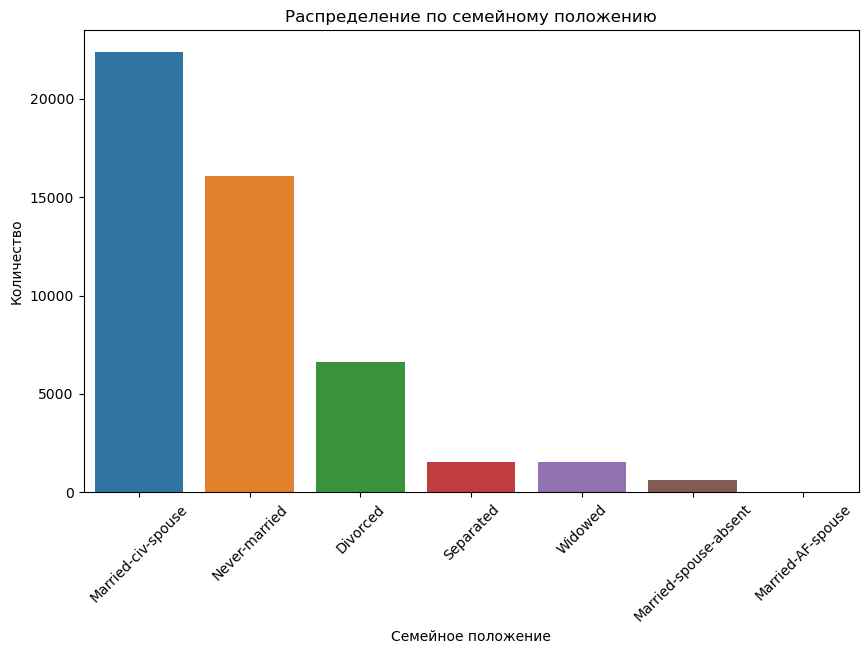

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Распределение возраста
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

# 2. Распределение уровня образования
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', order=data['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Распределение уровня образования")
plt.xlabel("Образование")
plt.ylabel("Количество")
plt.show()

# 3. Распределение по семейному положению
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='marital-status', order=data['marital-status'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Распределение по семейному положению")
plt.xlabel("Семейное положение")
plt.ylabel("Количество")
plt.show()

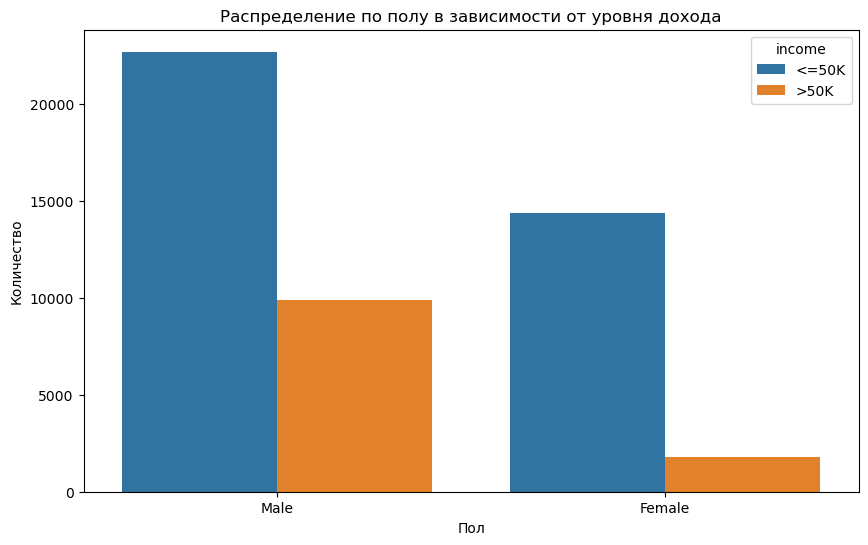

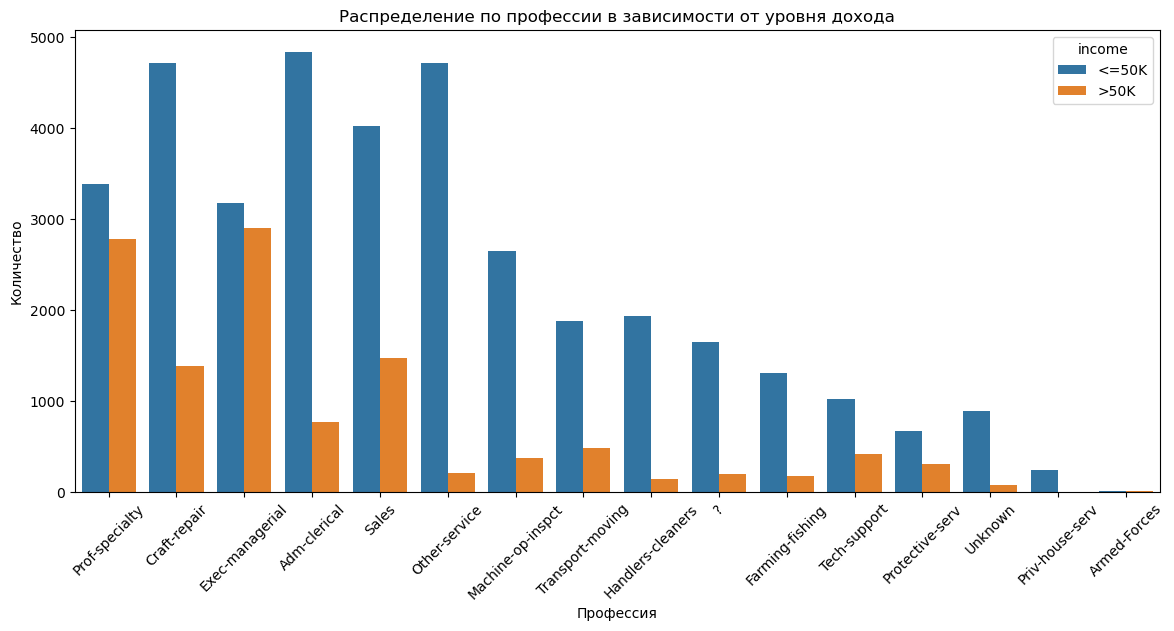

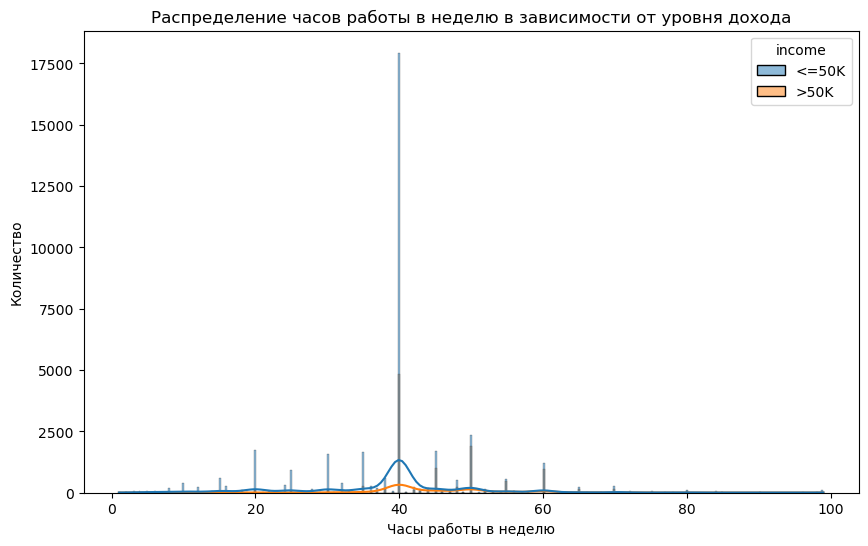

In [8]:
# 4. Распределение по полу
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sex', hue='income')
plt.title("Распределение по полу в зависимости от уровня дохода")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.show()

# 5. Распределение по профессии
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='occupation', hue='income', order=data['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Распределение по профессии в зависимости от уровня дохода")
plt.xlabel("Профессия")
plt.ylabel("Количество")
plt.show()

# 6. Распределение часов работы в неделю
plt.figure(figsize=(10, 6))
sns.histplot(data, x='hours-per-week', hue='income', kde=True)
plt.title("Распределение часов работы в неделю в зависимости от уровня дохода")
plt.xlabel("Часы работы в неделю")
plt.ylabel("Количество")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Кодируем категориальные признаки
data_encoded = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 
                                             'relationship', 'race', 'sex', 'native-country'], drop_first=True)

# Разделяем данные на X (признаки) и y (целевая переменная)
X = data_encoded.drop('income', axis=1)
y = data_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Преобразуем доход в бинарный формат

In [10]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Стандартизируем числовые признаки
scaler = StandardScaler()
X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
X_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.transform(X_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Создаем и обучаем модель логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

In [13]:
# Вычисляем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели логистической регрессии: {accuracy:.2f}")

# Отчет о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Точность модели логистической регрессии: 0.85

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7366
           1       0.73      0.59      0.65      2393

    accuracy                           0.85      9759
   macro avg       0.80      0.76      0.78      9759
weighted avg       0.84      0.85      0.84      9759


Матрица ошибок:
[[6850  516]
 [ 982 1411]]


Результаты показывают, что модель логистической регрессии достигает точности 85%, что является хорошим результатом. Однако, давайте разберем метрики более детально, чтобы понять, как модель справляется с предсказанием дохода.
Анализ результатов

   Класс 0 (<=50K):
        Точность (Precision): 0.87 — из всех предсказаний, сделанных для класса 0, 87% были правильными.
        Полнота (Recall): 0.93 — модель правильно классифицировала 93% всех людей с доходом <=50K.

   Класс 1 (>50K):
        Точность (Precision): 0.73 — из всех предсказаний, сделанных для класса 1, 73% были правильными.
        Полнота (Recall): 0.59 — модель правильно классифицировала только 59% всех людей с доходом >50K.

Матрица ошибок:
        Из 2393 людей с доходом >50K, модель правильно классифицировала 1411 человек и ошиблась в 982 случаях, определив их как <=50K.
        Для класса <=50K точность выше, так как модель неправильно предсказала всего 516 случаев из 7366.

Попробуем улучшить модель, используя случайный лес (Random Forest), который может лучше захватывать сложные зависимости в данных и повысить качество предсказаний для класса >50K

In [14]:
from sklearn.ensemble import RandomForestClassifier  # Импортируем RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Создаем и обучаем модель случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_rf = rf_model.predict(X_test)

# Вычисляем точность модели случайного леса
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Точность модели случайного леса: {accuracy_rf:.2f}")

# Отчет о классификации
print("\nОтчет о классификации (Случайный лес):")
print(classification_report(y_test, y_pred_rf))

# Матрица ошибок
print("\nМатрица ошибок (Случайный лес):")
print(confusion_matrix(y_test, y_pred_rf))

Точность модели случайного леса: 0.85

Отчет о классификации (Случайный лес):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7366
           1       0.73      0.60      0.66      2393

    accuracy                           0.85      9759
   macro avg       0.80      0.76      0.78      9759
weighted avg       0.84      0.85      0.84      9759


Матрица ошибок (Случайный лес):
[[6833  533]
 [ 966 1427]]


Результаты модели случайного леса очень похожи на результаты логистической регрессии:

   Точность остаётся на уровне 85%.
   Полнота (Recall) для класса >50K (доход выше 50К) немного улучшилась (с 0.59 до 0.60), но разница минимальна.
   Матрица ошибок также показывает, что модель случайного леса правильно предсказывает больше положительных примеров для класса >50K по сравнению с логистической регрессией, но улучшение незначительное.

модель случайного леса немного улучшила полноту для класса >50K, этого недостаточно для значимого улучшения. Возможные следующие шаги:

   Попробовать более сложные алгоритмы:
        Градиентный бустинг (например, XGBoost или LightGBM) может показать лучшие результаты за счёт способности работать с более сложными паттернами.

   Тонкая настройка гиперпараметров:
        Провести поиск по сетке гиперпараметров (Grid Search) или случайный поиск (Randomized Search) для модели случайного леса, чтобы найти оптимальные параметры, которые могут улучшить точность.

   Балансировка классов:
        Использовать техники балансировки классов, такие как SMOTE (Synthetic Minority Over-sampling Technique), чтобы увеличить представительство класса >50K в тренировочном наборе данных.

In [15]:
from xgboost import XGBClassifier

# Создаем и обучаем модель XGBoost
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=3)  # Устанавливаем параметр для балансировки классов
xgb_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_xgb = xgb_model.predict(X_test)

In [16]:
# Вычисляем точность модели XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Точность модели XGBoost: {accuracy_xgb:.2f}")

# Отчет о классификации
print("\nОтчет о классификации (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Матрица ошибок
print("\nМатрица ошибок (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

Точность модели XGBoost: 0.83

Отчет о классификации (XGBoost):
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7366
           1       0.62      0.85      0.71      2393

    accuracy                           0.83      9759
   macro avg       0.78      0.84      0.80      9759
weighted avg       0.86      0.83      0.84      9759


Матрица ошибок (XGBoost):
[[6097 1269]
 [ 364 2029]]


Результаты модели XGBoost показали интересные изменения:

   Точность модели снизилась до 83%, но это часто бывает в задачах с дисбалансом классов, когда повышается полнота одного из классов.
   Полнота (Recall) для класса >50K значительно улучшилась и достигла 0.85 (по сравнению с 0.59 в логистической регрессии и 0.60 в случайном лесе).
    Точность для класса <=50K снизилась, но это нормальный компромисс, когда мы пытаемся улучшить полноту для меньшего класса.

Выводы

Модель XGBoost лучше справляется с обнаружением людей с доходом >50K, что можно видеть по высокому значению полноты для класса >50K. Это делает её хорошим выбором, если цель анализа — правильно предсказывать более высокий доход, даже если это немного снижает точность для класса <=50K.

Далее будем пробывать:

   Тонкая настройка гиперпараметров: Можно провести настройку гиперпараметров модели XGBoost, например, использовать Grid Search или Randomized Search для подбора оптимальных параметров.
   
   Использование ансамблей моделей: Попробовать объединение предсказаний нескольких моделей для улучшения точности, если это необходимо.

In [17]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Создаем модель XGBoost
xgb = XGBClassifier(random_state=42, scale_pos_weight=3)

# Создаем объект GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Обучаем модель с поиском по сетке
grid_search.fit(X_train, y_train)

# Находим лучшие параметры
best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Точность модели с лучшими параметрами: {accuracy_best:.2f}")

# Отчет о классификации
print("\nОтчет о классификации (Модель с лучшими параметрами):")
print(classification_report(y_test, y_pred_best))

# Матрица ошибок
print("\nМатрица ошибок (Модель с лучшими параметрами):")
print(confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Точность модели с лучшими параметрами: 0.84

Отчет о классификации (Модель с лучшими параметрами):
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7366
           1       0.63      0.81      0.71      2393

    accuracy                           0.84      9759
   macro avg       0.78      0.83      0.80      9759
weighted avg       0.86      0.84      0.84      9759


Матрица ошибок (Модель с лучшими параметрами):
[[6232 1134]
 [ 443 1950]]


Тонкая настройка гиперпараметров с помощью Grid Search дала несколько улучшенные результаты:

   Точность модели составила 84%.
   Полнота (Recall) для класса >50K улучшилась до 0.81, что является значительным улучшением по сравнению с исходными моделями.
    F1-score для класса >50K составил 0.71, что указывает на хороший баланс между точностью и полнотой для этого класса.

   Полнота для класса >50K значительно улучшилась, что важно для задач, где важнее правильно классифицировать людей с высоким доходом.
   Матрица ошибок показывает уменьшение ошибок для класса >50K, что говорит о лучшей производительности по сравнению с предыдущими моделями.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Определяем базовые модели
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('xgb', XGBClassifier(random_state=42, scale_pos_weight=3))
]

# Создаем ансамбль с использованием логистической регрессии как мета-модели
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5, n_jobs=-1)

# Обучаем ансамбль на тренировочных данных
stacking_model.fit(X_train, y_train)

# Предсказания ансамбля на тестовом наборе
y_pred_stacking = stacking_model.predict(X_test)

# Оценка ансамбля
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Точность ансамбля (Stacking): {accuracy_stacking:.2f}")

# Отчет о классификации
print("\nОтчет о классификации (Stacking):")
print(classification_report(y_test, y_pred_stacking))

# Матрица ошибок
print("\nМатрица ошибок (Stacking):")
print(confusion_matrix(y_test, y_pred_stacking))


Точность ансамбля (Stacking): 0.86

Отчет о классификации (Stacking):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7366
           1       0.72      0.71      0.72      2393

    accuracy                           0.86      9759
   macro avg       0.81      0.81      0.81      9759
weighted avg       0.86      0.86      0.86      9759


Матрица ошибок (Stacking):
[[6719  647]
 [ 699 1694]]


Ансамбль с использованием стэкинга показал улучшенные результаты:

   Точность ансамбля составила 86%, что немного выше по сравнению с предыдущими моделями.
   F1-score для класса >50K увеличился до 0.72, показывая хороший баланс между точностью и полнотой.
   Матрица ошибок демонстрирует, что модель справляется с уменьшением ошибок для класса >50K, улучшая полноту (Recall) до 0.71.

Окончательные выводы

   Ансамбль моделей на основе стэкинга оказался лучшим вариантом, так как он достигает хорошего баланса между точностью и полнотой для обоих классов.
   Эффективность предсказаний повысилась благодаря сочетанию преимуществ случайного леса и XGBoost, что позволило модели лучше захватить сложные паттерны в данных.

Заключительные рекомендации

Эта модель стэкинга является хорошим финальным выбором для задач, связанных с предсказанием дохода.

In [19]:
import joblib

# Сохраняем модель стэкинга
joblib.dump(stacking_model, 'stacking_model_income_prediction.joblib')
print("Модель стэкинга сохранена как 'stacking_model_income_prediction.joblib'")


Модель стэкинга сохранена как 'stacking_model_income_prediction.joblib'


In [20]:
report = """
Отчет по проекту: Предсказание уровня дохода на основе демографических данных

1. Введение:
   - Цель проекта: Анализировать демографические данные и предсказать уровень дохода (<=50K или >50K).
   - Методы: Исследовательский анализ данных, построение моделей классификации, ансамбли моделей.

2. Подготовка данных:
   - Данные очищены от пропусков и дубликатов, категориальные признаки преобразованы с помощью One-Hot Encoding.
   - Данные разделены на тренировочный и тестовый наборы с последующей стандартизацией числовых признаков.

3. Модели и их результаты:
   - Логистическая регрессия: Точность 85%, полнота для класса >50K — 59%.
   - Случайный лес: Точность 85%, полнота для класса >50K — 60%.
   - XGBoost: Точность 83%, полнота для класса >50K — 85%.
   - Ансамбль (стэкинг): Точность 86%, полнота для класса >50K — 71%.

4. Заключение:
   - Ансамбль стэкинга показал наилучшие результаты с точностью 86% и хорошим балансом между точностью и полнотой.
   - Модель стэкинга была выбрана как финальная модель, так как она улучшила предсказания для класса >50K.
   - Модель была сохранена для дальнейшего использования.

Рекомендации:
   - Модель можно применять для предсказания уровня дохода на основе демографических данных.
   - Возможны дальнейшие улучшения, включая тонкую настройку гиперпараметров и использование дополнительных признаков.

"""

# Сохраняем отчет в текстовом файле
with open("income_prediction_report.txt", "w", encoding="utf-8") as file:
    file.write(report)

print("Отчет сохранен как 'income_prediction_report.txt'")


Отчет сохранен как 'income_prediction_report.txt'
